# Dynamics Learning Tutorial
This tutorial will walk you through the steps to train networks, so you can hopefully go and use _script-testing.py_ to rapidly iterate on designs.

### CONDA
I'm going to add a block on creating a new conda environment with all the required components here. To begin, once installing conda make a new environment with python 3.5

'conda create - n myenv python=3.5'

Then to use the environement call:

'conda activate myenv'
(note, for some older conda installations you may need to use source activate myenv. This is generalized to the above line in conda 4.4 and newer. bash edits detailed here: https://github.com/conda/conda/releases/tag/4.4.0)

First we will install pytorch (details here https://pytorch.org/). On mac, for the versions we are using do this:

'conda install pytorch torchvision -c pytorch'

and windows,

'conda install pytorch-cpu -c pytorch', 
'pip3 install torchvision'

Then we need a few other packages (my base conda has a few other math & computation packages by default. Try

'conda install numpy scipy scikit-learn matplotlib nb_conda'

Note, nb_conda is a package that assists in jupyter notebook use. There is an alternate approach that involves adding the ipykernels and changing the called python in the jupyter kernel. Just isntalling a package is easier for me, which works. In the involved case, check out commands similar to below:

'conda install ipykernel --name myenv', 'python -m ipykernel install''

Last here is a system check. The sys.executable should point to the python you want to use, and sys.path points to where you are importing packages from.

In [25]:
import sys
print(sys.executable)
print(sys.path)

/Users/nato/anaconda3/envs/dynam-learn/bin/python
['', '/Users/nato/anaconda3/envs/dynam-learn/lib/python35.zip', '/Users/nato/anaconda3/envs/dynam-learn/lib/python3.5', '/Users/nato/anaconda3/envs/dynam-learn/lib/python3.5/plat-darwin', '/Users/nato/anaconda3/envs/dynam-learn/lib/python3.5/lib-dynload', '/Users/nato/anaconda3/envs/dynam-learn/lib/python3.5/site-packages', '/Users/nato/anaconda3/envs/dynam-learn/lib/python3.5/site-packages/torchvision-0.2.1-py3.5.egg', '/Users/nato/anaconda3/envs/dynam-learn/lib/python3.5/site-packages/IPython/extensions', '/Users/nato/.ipython']


### IMPORT
First we need to import many packages. Below you will see built in python packages that you need to isntall, and functions defined in other files.

In [26]:
import numpy as np

# Dynamcis functions
from dynamics import *
from controllers import randController, MPController
from dynamics_ionocraft import IonoCraft
from dynamics_crazyflie_linearized import CrazyFlie

# Utilities
from utils_plot import *
from utils_data import *

# NN Class
from model_general_nn import GeneralNN, predict_nn

# pytorch
import torch
from torch.nn import MSELoss
from torch import load

# Debugging
import time
import datetime

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### INITIALIZATION
First we are going to declare some variables. This will create a dynamics object to keep track of some state dimensions and time step etc. For simulation we need to know how much slower to sample the simulated data for the sensors to 'read'. 

In [27]:
# initialize some variables
dt_x = .0002        # 5khz dynam update
dt_m = .002         # 500 hz measurement update
dt_u = .004         # ~200 hz control update
samp = int(dt_m/dt_x)     # effective sample rate of simulated data

print('Simulation update step is: ', dt_x, ' and control update is: ', dt_u, 'the ratio is: ', dt_u/dt_x)

# dynamics object
iono1 = IonoCraft(dt_x, threeinput = True, x_noise = 1e-9)

Simulation update step is:  0.0002  and control update is:  0.004 the ratio is:  20.0


### LOADING DATA
Now we need to load our training data. For the simple simulated data, or data that has already been processed from a .txt file we can use np.load()

In [21]:
# Load training data
npzfile = np.load('_simmed_data/testingfile_generalnn.npz')
Seqs_X = npzfile['arr_0']
Seqs_U = npzfile['arr_1']

### NUERAL NETS
This is a example of training a nueral net object. Later will show how to tune options, and include some figures for premade comaparisons.

Epoch: 0001 train loss= 7530.918457 test loss= 57.937283
Epoch: 0002 train loss= 4593.717285 test loss= 30.011550
Epoch: 0003 train loss= 1661.423218 test loss= 1.355871
Epoch: 0004 train loss= -1379.486816 test loss= -28.371768
Epoch: 0005 train loss= -4493.302734 test loss= -58.346406
Epoch: 0006 train loss= -7619.512695 test loss= -88.390233
Epoch: 0007 train loss= -10751.146484 test loss= -118.371326
Epoch: 0008 train loss= -13873.891602 test loss= -148.473443
Epoch: 0009 train loss= -17047.193359 test loss= -179.445635
Epoch: 0010 train loss= -20312.490234 test loss= -211.470907
Epoch: 0011 train loss= -23706.494141 test loss= -245.060786
Epoch: 0012 train loss= -27301.621094 test loss= -280.933957
Epoch: 0013 train loss= -31174.750000 test loss= -319.729108
Epoch: 0014 train loss= -35362.859375 test loss= -361.512772
Epoch: 0015 train loss= -39880.500000 test loss= -406.472143
Epoch: 0016 train loss= -44755.550781 test loss= -455.121653
Epoch: 0017 train loss= -50020.078125 test 

Epoch: 0134 train loss= -275645.875000 test loss= -2547.272766
Epoch: 0135 train loss= -275248.406250 test loss= -2500.778788
Epoch: 0136 train loss= -275589.062500 test loss= -2535.356771
Epoch: 0137 train loss= -275095.312500 test loss= -2507.465922
Epoch: 0138 train loss= -273638.812500 test loss= -2507.950317
Epoch: 0139 train loss= -275732.875000 test loss= -2482.137817
Epoch: 0140 train loss= -273018.156250 test loss= -2401.817098
Epoch: 0141 train loss= -274065.718750 test loss= -2520.845276
Epoch: 0142 train loss= -275277.062500 test loss= -2513.924418
Epoch: 0143 train loss= -276329.562500 test loss= -2519.225098
Epoch: 0144 train loss= -275710.500000 test loss= -2531.781840
Epoch: 0145 train loss= -277147.906250 test loss= -2550.137939
Epoch: 0146 train loss= -275582.843750 test loss= -2447.740031
Epoch: 0147 train loss= -274667.093750 test loss= -2513.274516
Epoch: 0148 train loss= -275685.750000 test loss= -2547.056620
Epoch: 0149 train loss= -276106.593750 test loss= -2546

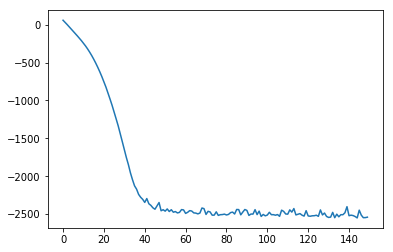

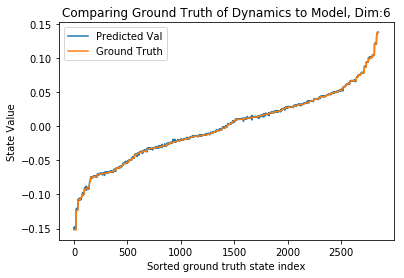

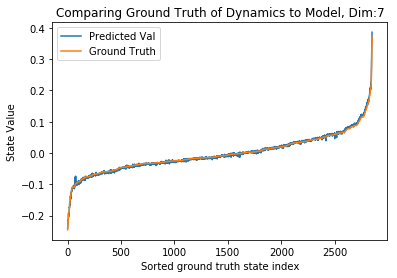

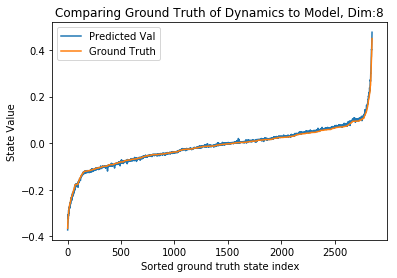

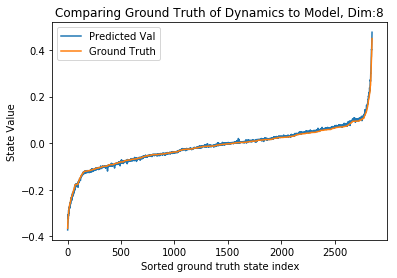

In [28]:
# create nn object for training on simulated data
n_in_input = 3     # number of inputs (u) into the NN
n_in_state = 3     # number of states to input into the NN
n_out = 3          # number of states to predict
state_idx_l = [6,7,8]  # index of full state vector states passed into NN 6,7,8 is yaw,pitch, roll
prob_flag = True       # probablistic NN if True, deterministic if False
hidden_w = 300         # hidden width of the two hidden layers
pred_type = 'Next State' # next state rather than change in state
# NOTE: the NN structure is input layer, 2 ReLU hidden layers, output layer
newNN = GeneralNN(n_in_input = n_in_input, 
                  n_in_state = n_in_state, 
                  n_out = n_out, 
                  state_idx_l=state_idx_l, 
                  prob=prob_flag, 
                  pred_mode = pred_type)

# some state selection lists
ypraccel = [6,7,8,12,13,14]
ypr = [6,7,8]

# train NN
# This is the structure for NN data. For simulated data, downsample by samp
training_data = (Seqs_X[:,::samp,ypr], Seqs_U[:,::samp,:])
lr = 2.5e-5 # learning rate
ep = 150     # epochs
bs = 100     # batch size
# Changing optimizer for SGD to Adam requires re-tuning parameters (fairly easy)
acc = newNN.train(training_data, 
                  learning_rate=lr, 
                  epochs=ep, 
                  batch_size = bs, 
                  optim="Adam")

plot_acc = True
if plot_acc:
    plt.plot(np.transpose(acc))
    plt.show()
    
# data package for plotting
data = sequencesXU2array(Seqs_X[:,::samp,:], Seqs_U[:,::samp,:])

# check accuracy of model by plotting prediction vs true value
plot_model(data, newNN, 6, model_dims = ypr, delta=False)
plot_model(data, newNN, 7, model_dims = ypr, delta=False)
plot_model(data, newNN, 8, model_dims = ypr, delta=False)

A fun exercise is to change the training parameters and you can see the convergence of the model change. In this case you cannot change the input type (I could add a function to convert between the two in simulated data, but it's currently not there). While you're reading, I looked at Roberto's code and they avoid issues like this by using prebuild simulation environments, so their code would be hard to use with a real experiment right now too. We are moving that along!

#### SAVING AND LOADING MODELS
This code section is optional, but will show you how to save and load models.

In [31]:
# Saves model with date string for sorting
dir_str = str('_models/')
date_str = str(datetime.date.today())
model_name = str('_MODEL_tutorial')
newNN.save_model(dir_str+date_str+model_name+'.pth')

# Or load model
newNNloaded = torch.load(dir_str+date_str+model_name+'.pth')

### OBJECTIVE FUNCTIONS
This section outlines how the objective functions base works. You'll see the class Objective in _controllers.py_. The example below initializes an objective function that minimizes the distance to 0 across the dimensions listed. _np.linalg.norm_ can and should be replaced by custom functions. # If you wanted to design your own function, the function using as an objective will be passed state vectors over the time. Currently we will need to either add a function in compute self.compute_ARGmm and self.compute_mm that looks at the entire state array. For clarification, the state array is two dimensional (n, dx) where n is the time horizon and dx is the number of state variables to look at. For example, you could change self.eval() to just look at the last row of a prediction matrix to make greedy longer-horizon predictions.


In [33]:
# Example Objective function init. It is minimizing the 2norm across 6 dimensions of the sim
origin_minimizer = Objective(np.linalg.norm, 
                             'min', 
                             6, 
                             dim_to_eval=[6,7,8,12,13,14])



### MPC 
The MPC takes in the nn and the objective function to control the robot. This is a fairly simple object that happens to take a bunch of parameters, only a couple of which are important. For running an MPC on real data the parameters you will DEFINITELY need to change are dt_x an dt_u. These are used in simulation to make it so the controller updates slower than the simulated dynamics. In real life, you want this to be continuous. If you set dt_x = dt_u the controller will compute a new value every time you call mpc1.update(cur_state)

You may need to create a new Dynamics object of 'real ionocraft' with the desired state variables and sizes. The dynamics object are inherited to sample random actions for the controller. You will need to change the variance to a number proportional to the PWM value variance you want. Currently it is set to the force variance.

In [39]:
mpc1 = MPController(newNN, # dynamics model with self.predict()
                    iono1, # true dynamics object (for dimensions etc)
                    dt_x,  # time update for MPC stepping
                    dt_u,  # control update
                    origin_minimizer, # objective function
                    N=50,  # number of random sequences to test
                    T=5,   # time horizon
                    variance = .00003) # variance of random actions sampled.

#### TOOLS
Below are a couple optional snippets to show how things can be plotted

In [36]:
# Can simulate a ionocraft with the new controller. Could be fun to try real data in simulation?
new_len = 500
x_controlled, u_seq = sim_sequence(iono1, dt_m, dt_u, controller = mpc1, sequence_len = new_len, to_print = False)

# Plot the states
T = np.linspace(0,new_len*dt_x,new_len)
plot12(x_controlled, T)     # Familiar 12 state plot of simulated robot over the designed controller with objective function


This one is slow, but can create pretty gifs. Change save to True and it will save the flight animation to the working directory.

In [ ]:
plotter1 = PlotFlight(x_controlled[::15,:],.5)
plotter1.show(save=False)